# Supervised Learning

In this notebook, we are going to attempt different tree-based supervised learning models. They are:
- Decision Tree
- Random Forest
- CatBoost
- XGBoost
- LGMB

**Things to do:**
- edit the scoring metric to include recall and f1 (note: need to adjust it since our classification is multiclass)

# Load in the Dataset + Packages

In [3]:
# pip install graphviz
import sklearn
# import graphviz 
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\anupr\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [16]:
#dataset
# df = pd.read_excel("df_full_clean.xlsx", usecols = "A:BB")
df = pd.read_excel("smote.xlsx", usecols = "A:BA")


#imputation of NRI score with mean value
df['NRI score'] = df['NRI score'].replace(0, np.NaN)
df['NRI score'] = df['NRI score'].replace(np.NaN, df['NRI score'].mean())

FileNotFoundError: [Errno 2] No such file or directory: 'smote.xlsx'

In [ ]:
df['NRI score'].mean()

In [ ]:
df['NRI score'].unique()

In [ ]:
df['Risk_Label'] = df['Risk_Label'].astype('category')
df['Risk_Label']

In [ ]:
# dropped security_test_category
X = df.drop(columns = ['Risk_Label'])
y = df['Risk_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

## 1. Decision Tree

### Basic Approach

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = tree.DecisionTreeClassifier(random_state=37, max_depth = 6, criterion='gini')

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
# Visualise the tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(25,12))
fn = list(X_train)
cn = list(y_train)
tree.plot_tree(clf, 
              feature_names = fn,
              class_names = cn,
              fontsize=10,
              filled=True)
fig.savefig('trial.png')

In [ ]:
# Alternative visualisation
visualise_tree = tree.export_graphviz(clf, out_file=None,
                                      feature_names = fn,
                                      class_names = cn,
                                     filled=True)
graph = graphviz.Source(visualise_tree)
graph

# See here for more [https://scikit-learn.org/stable/modules/tree.html]


In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

### Various hyperparameters to attempt

In [ ]:
# max depth
clf_maxdepth = DecisionTreeClassifier(random_state=37, max_depth=5)
clf_maxdepth = clf_maxdepth.fit(X_train,y_train)
y_pred = clf_maxdepth.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# max_leaf_nodes
clf_maxleafnode = DecisionTreeClassifier(random_state=37, max_leaf_nodes=5)
clf_maxleafnode = clf_maxleafnode.fit(X_train,y_train)
y_pred = clf_maxleafnode.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

## 2. Random Forest

### Basic Approach

In [ ]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [ ]:
scoring_metric = ["accuracy", "f1_weighted"]
results = {}

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_clf = RandomForestClassifier(n_estimators=100, random_state=37, n_jobs=-1) # n_estimators = no. of trees in the forest
rf_clf.fit(X_train, y_train)

In [ ]:
results["Random forests"] = mean_std_cross_val_scores(
    rf_clf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

In [ ]:
# rf_clf(X_test)

In [ ]:
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf_clf))

In [ ]:
# feature importance
# feature_imp = pd.Series(rf_clf.feature_importances_, 
                        # index = X_train.feature_names).sort_values(ascending = False)
# feature_imp

### Various hyperparameters to attempt

In [ ]:
# random_grid = {'bootstrap': [True, False],
#                'max_depth': [2, 4, 6, 8, 10, 12, None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4],
#                'min_samples_split': [2, 5, 10],
#                'n_estimators': [130, 180, 230]}

In [ ]:
# scoring_metric = ["accuracy"]
# rf_random = RandomizedSearchCV(estimator = rf, 
#                                param_distributions = random_grid, 
#                                n_iter = 100, 
#                                cv = 3, 
#                                verbose=2, 
#                                random_state=37, 
#                                n_jobs = -1,
#                                scoring = scoring_metric,
#                                return_train_score=True)

In [ ]:
# rf_random.fit(X_train, y_train)

In [ ]:
# cv_results = rf_random.cv_results_
# for mean_score, params in zip(cv_results["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [ ]:
# find best params
# best_params = rf_random.best_params_
# best_params

In [ ]:
# best score
# rf_random.best_score_

In [ ]:
# df_rf_random = pd.DataFrame(rf_random.cv_results_)
# df_rf_random

## 3. All the boosts

### Reference:
https://pages.github.ubc.ca/mds-2021-22/DSCI_573_feat-model-select_students/lectures/05_ensembles.html

In [26]:
classifiers = {
    "CatBoost": CatBoostClassifier(verbose=0, random_state=37),
    "XGBoost": XGBClassifier(random_state=37, eval_metric='logloss', verbosity=0),
    # "LightGBM": LGBMClassifier(random_state=37),
    "Decision Tree": DecisionTreeClassifier(random_state=37),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=37)
}

In [1]:
results = {}
scoring_metric = ["accuracy", "f1_macro", "recall_macro"]

In [2]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [ ]:
dummy = DummyClassifier(strategy="stratified")
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [ ]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

In [ ]:
pd.DataFrame(results).T

In [ ]:
# CatBoost
model = CatBoostClassifier(verbose=0, random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: CatBoost")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

In [ ]:

print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: Random Forest")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

In [ ]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

In [ ]:
# Decision Tree
model = DecisionTreeClassifier(random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: Decision Tree")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

In [ ]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

# Feature Importance

In [4]:
# Import dependencies
import openpyxl
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import pandas as pd

In [5]:
# Load sample data from excel
api_df = pd.read_excel("../../data/raw/smote_V2.xlsx")
api_df.head()

,is_pii,is_fii,NRI score,authentication_processed,usage_base_processed,AI & Data Science,Business & Technology,Environment & Weather,Finance & Banking,GeoInformatics & Navigation,...,set-cookie,access-control-allow-origin,server,x-powered-by,x-aspnet-version,x-ratelimit-limit,metadata_fields_count,parameters_count,api_endpoint_id_y,Risk_Label
0,True,False,81.089820,1,2,0,0,1,0,0,...,0,1,1,0,0,0,3,4,1,Low Risk
1,True,False,76.479613,1,2,0,0,0,0,0,...,0,0,1,0,0,0,4,1,2,Low Risk
2,True,False,76.479613,1,2,0,0,0,0,0,...,0,0,1,0,0,0,4,1,2,Low Risk
3,True,False,76.479613,1,2,0,0,0,0,0,...,0,0,1,0,0,0,4,1,2,Low Risk
4,True,False,76.479613,1,2,0,0,0,0,0,...,0,0,1,0,0,0,4,1,2,Low Risk


In [6]:
api_df.shape

(2952, 54)

In [7]:
train_df, test_df = train_test_split(api_df, test_size=0.2, random_state=42)

In [8]:
X_train, y_train = train_df.drop(columns=["Risk_Label"]), train_df["Risk_Label"]
X_test, y_test = test_df.drop(columns=["Risk_Label"]), test_df["Risk_Label"]

In [39]:
#X_train, X_valid, y_train, y_valid = train_test_split(
#    X_train_big, y_train_big, test_size=0.2, random_state=123
#)

In [40]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())

In [41]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [62]:
data_coef = {
    "coefficient": pipe_lr.named_steps['logisticregression'].coef_.tolist()[0],
    "magnitude": np.absolute(pipe_lr.named_steps['logisticregression'].coef_)[0],
}
coef_df = pd.DataFrame(data_coef, index=X_train.columns).sort_values("magnitude", ascending=False)
coef_df

,coefficient,magnitude
is_fii,2.237613,2.237613
server,-1.129201,1.129201
x0_Missing,-1.096775,1.096775
metadata_fields_count,-1.065617,1.065617
Information & Science,-0.926595,0.926595
is_pii,0.779327,0.779327
Software & Services,-0.716773,0.716773
Government & Public Services,-0.684074,0.684074
Social Media & Technology,-0.626856,0.626856
x0_Broken Authentication,0.603235,0.603235


# Feature Selection

In [94]:
results["lr"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [95]:
pd.DataFrame(results)

,lr,dt,dt+model_based_fs,dt+rfe
fit_time,0.054 (+/- 0.012),0.015 (+/- 0.003),0.051 (+/- 0.011),1.344 (+/- 0.050)
score_time,0.007 (+/- 0.005),0.004 (+/- 0.002),0.002 (+/- 0.002),0.000 (+/- 0.000)
test_accuracy,0.997 (+/- 0.003),NaN,NaN,NaN
test_f1_macro,0.997 (+/- 0.003),NaN,NaN,NaN
test_recall_macro,0.997 (+/- 0.003),NaN,NaN,NaN
test_score,NaN,0.998 (+/- 0.001),0.998 (+/- 0.001),0.999 (+/- 0.001)
train_accuracy,1.000 (+/- 0.000),NaN,NaN,NaN
train_f1_macro,1.000 (+/- 0.000),NaN,NaN,NaN
train_recall_macro,1.000 (+/- 0.000),NaN,NaN,NaN
train_score,NaN,1.000 (+/- 0.000),1.000 (+/- 0.000),1.000 (+/- 0.000)


In [11]:
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())

results["dt"] = mean_std_cross_val_scores(
    pipe_dt, X_train, y_train, return_train_score=True
)

In [12]:
pd.DataFrame(results)

,dt
fit_time,0.021 (+/- 0.012)
score_time,0.004 (+/- 0.001)
test_score,0.998 (+/- 0.001)
train_score,1.000 (+/- 0.000)


In [57]:
from sklearn.feature_selection import SelectFromModel

select_lr = SelectFromModel(LogisticRegression(), threshold="mean")

In [58]:
pipe_dt_model_based = make_pipeline(
    StandardScaler(), select_lr, DecisionTreeClassifier(random_state=42)
)

results["dt+model_based_fs"] = mean_std_cross_val_scores(
    pipe_dt_model_based, X_train, y_train, return_train_score=True
)

pd.DataFrame(results)

,lr,dt,dt+model_based_fs
fit_time,0.048 (+/- 0.012),0.015 (+/- 0.003),0.051 (+/- 0.011)
score_time,0.004 (+/- 0.007),0.004 (+/- 0.002),0.002 (+/- 0.002)
test_score,0.997 (+/- 0.003),0.998 (+/- 0.001),0.998 (+/- 0.001)
train_score,1.000 (+/- 0.000),1.000 (+/- 0.000),1.000 (+/- 0.000)


In [59]:
pipe_dt_model_based.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(),
                                 threshold='mean')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [60]:
pipe_dt_model_based.named_steps["selectfrommodel"].n_features_in_

53

In [86]:
from sklearn.feature_selection import RFE

select_rfe = RFE(LogisticRegression(), n_features_to_select=8)

pipe_dt_rfe = make_pipeline(StandardScaler(), select_rfe, DecisionTreeClassifier(random_state=42))

results["dt+rfe"] = mean_std_cross_val_scores(
    pipe_dt_rfe, X_train, y_train, return_train_score=True
)

pd.DataFrame(results)

,lr,dt,dt+model_based_fs,dt+rfe
fit_time,0.048 (+/- 0.012),0.015 (+/- 0.003),0.051 (+/- 0.011),1.344 (+/- 0.050)
score_time,0.004 (+/- 0.007),0.004 (+/- 0.002),0.002 (+/- 0.002),0.000 (+/- 0.000)
test_score,0.997 (+/- 0.003),0.998 (+/- 0.001),0.998 (+/- 0.001),0.999 (+/- 0.001)
train_score,1.000 (+/- 0.000),1.000 (+/- 0.000),1.000 (+/- 0.000),1.000 (+/- 0.000)


In [87]:
pipe_dt_rfe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=8)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [88]:
pipe_dt_rfe.named_steps["rfe"].n_features_

8

In [89]:
rfe_fs = pipe_dt_rfe.named_steps["rfe"].support_

In [90]:
rfe_selected_feats = X_train.columns[rfe_fs]
rfe_selected_feats

Index(['is_pii', 'is_fii', 'Information & Science', 'x0_Broken Authentication',
       'x0_Missing', 'access-control-allow-origin', 'server',
       'metadata_fields_count'],
      dtype='object')

In [ ]:
'authentication_processed',
       'security_test_result_processed','access-control-allow-origin', 'server']

In [91]:
n_feats = np.arange(1, 53)
train_scores = []
cv_scores = []

for n in n_feats:
    rfe = RFE(LogisticRegression(), n_features_to_select=n)
    pipe = make_pipeline(StandardScaler(), rfe, DecisionTreeClassifier())
    scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(scores["train_score"].mean())
    cv_scores.append(scores["test_score"].mean())

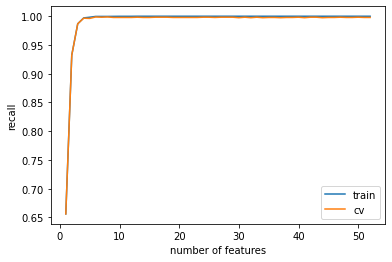

In [92]:
plt.plot(n_feats, train_scores, label="train")
plt.plot(n_feats, cv_scores, label="cv")
plt.legend()
plt.xlabel("number of features")
plt.ylabel("recall");

In [101]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(LogisticRegression())

pipe_dt_rfecv = make_pipeline(
    StandardScaler(), rfecv, DecisionTreeClassifier(random_state=42)
)

results["dt+rfecv"] = mean_std_cross_val_scores(
    pipe_dt_rfecv, X_train, y_train, return_train_score=True
)

In [102]:
pd.DataFrame(results)

,dt+rfecv
fit_time,8.599 (+/- 0.265)
score_time,0.003 (+/- 0.002)
test_score,0.998 (+/- 0.001)
train_score,1.000 (+/- 0.000)


In [104]:
pipe_dt_rfecv.fit(X_train, y_train)
pipe_dt_rfecv.named_steps["rfecv"].n_features_

7

In [105]:
rfecv_fs = pipe_dt_rfecv.named_steps["rfecv"].support_
rfecv_selected_feats = X_train.columns[rfecv_fs]
rfecv_selected_feats

Index(['is_pii', 'is_fii', 'Information & Science', 'x0_Broken Authentication',
       'x0_Missing', 'server', 'metadata_fields_count'],
      dtype='object')

# SHAP Analysis

In [9]:
import shap

C:\Users\anupr\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
dt_explainer = shap.KernelExplainer(pipe_dt.named_steps["decisiontreeclassifier"], X_train)
train_dt_shap_values = dt_explainer.shap_values(X_train)

Provided model function fails when applied to the provided data set.


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
pipe_dt.named_steps["decisiontreeclassifier"]

DecisionTreeClassifier()